In [1]:
import xarray as xr
import numpy as np

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import matplotlib.colors as colors
import matplotlib.cm as cm

In [3]:
dst_raw = xr.open_dataset("D:\PROJECTS\hnsw_soil_moisture_surface\soil_moisture_all.nc")

dst_raw.variables

Frozen({'SLM10': <xarray.Variable (time: 1096, latitude: 24, longitude: 24)>
[631296 values with dtype=float32]
Attributes:
    units:      %
    long_name:  10cm Soil Moisture Content, 'SLM20': <xarray.Variable (time: 1096, latitude: 24, longitude: 24)>
[631296 values with dtype=float32]
Attributes:
    units:      %
    long_name:  20cm Soil Moisture Content, 'SLM40': <xarray.Variable (time: 1096, latitude: 24, longitude: 24)>
[631296 values with dtype=float32]
Attributes:
    units:      %
    long_name:  40cm Soil Moisture Content, 'AVG': <xarray.Variable (time: 1096, latitude: 24, longitude: 24)>
[631296 values with dtype=float32]
Attributes:
    units:      %
    long_name:  Average Soil Moisture Content, 'time': <xarray.IndexVariable 'time' (time: 1096)>
array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', ..., '2020-12-29T00:00:00.000000000',
       '2020-12-30T00:00:00.000000000', '2020-12-31T00:00:00.000000000'],
   

In [17]:
dst = dst_raw.sel(time=slice('2018-01-01', '2020-12-31'))

In [18]:
time_series = dst['time'].values
time_series

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', ...,
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
SLM10 = dst['SLM10'].mean(dim=['latitude', 'longitude']).values
SLM20 = dst['SLM20'].mean(dim=['latitude', 'longitude']).values
SLM40 = dst['SLM40'].mean(dim=['latitude', 'longitude']).values
AVG = dst['AVG'].mean(dim=['latitude', 'longitude']).values

SLM10, SLM20, SLM40, AVG

(array([21.067583, 21.231918, 21.95427 , ..., 21.690657, 21.485952,
        21.485952], dtype=float32),
 array([21.694546, 21.695671, 22.038797, ..., 32.183395, 29.928505,
        29.928505], dtype=float32),
 array([21.216522, 21.245934, 21.46425 , ..., 23.654198, 24.529648,
        24.529648], dtype=float32),
 array([21.39049 , 21.419247, 21.928635, ..., 26.449638, 26.269432,
        26.269432], dtype=float32))

In [20]:
# SLM10 = dst['SLM10'].values[:, 7, 7]
# SLM20 = dst['SLM20'].values[:, 7, 7]
# SLM40 = dst['SLM40'].values[:, 7, 7]
# AVG = dst['AVG'].values[:, 7, 7]
# 
# SLM10, SLM20, SLM40, AVG

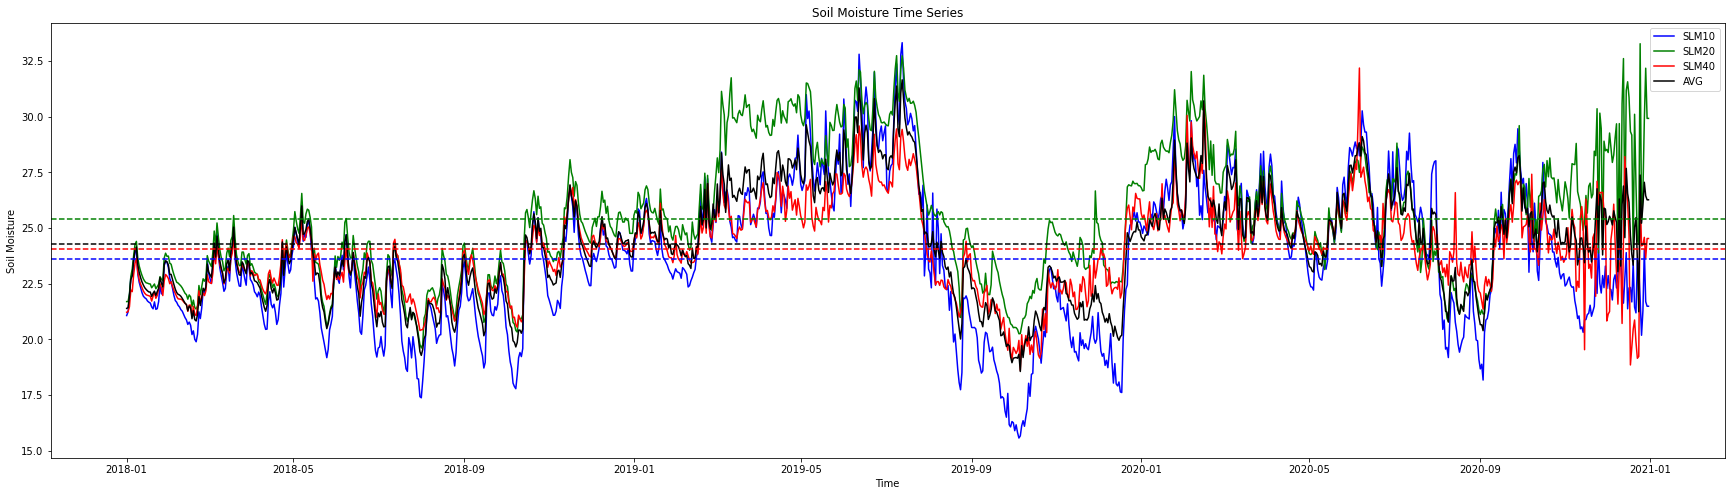

In [36]:
# PLOT

fig, ax = plt.subplots(figsize=(30, 8))

glob_colors = ['b', 'g', 'r', 'k']

ax.plot(time_series, SLM10, label='SLM10', color=glob_colors[0])
ax.plot(time_series, SLM20, label='SLM20', color=glob_colors[1])
ax.plot(time_series, SLM40, label='SLM40', color=glob_colors[2])
ax.plot(time_series, AVG, label='AVG', color=glob_colors[3])

# 画横线 
ax.axhline(y=SLM10.mean(), color=glob_colors[0], linestyle='--')
ax.axhline(y=SLM20.mean(), color=glob_colors[1], linestyle='--')
ax.axhline(y=SLM40.mean(), color=glob_colors[2], linestyle='--')
ax.axhline(y=AVG.mean(), color=glob_colors[3], linestyle='--')


ax.set_xlabel('Time')
ax.set_ylabel('Soil Moisture')
ax.set_title('Soil Moisture Time Series')
ax.legend()

In [28]:
SLM10.mean()

23.618774